# Árvore de decisão aplicada na base Íris

Agora com as partições A, B e C, podemos aplicar o algoritmo de árvore de decisão com a métrica de entropia. 

Teoricamente, a equação de entropia é dada por:

$$
\text{Entropia}(S) = -\sum_{i=1}^{n} p_i \log_2 p_i
$$

Na própria documentação do scikit learn [aqui](https://scikit-learn.org/stable/modules/tree.html#classification-criteria) podemos ver que para o critério de entropia o mesmo cálculo é adotado. 

Usando-se a entropia, podemos calcular o ganho de cada variável. A que tiver o maior ganho, será usada para o nó inicial de decisão. O processo de calcular o ganho precisa ser repetido para a geração de cada novo nó, isolando-se as amostras que são filtradas pelo pai desses nós.

Vamos carregar os nossos datasets abaixo e construir a árvore de decisão, para os três experimentos, assim como pede a especificação do segundo trabalho.


Os resultados de acurácia, sensitividade, especificidade e outras métricas serão armazenada aqui, para uso posterior em comparação:

In [72]:
import pandas as pd

metrics_df = pd.DataFrame(columns=["treinamento", "acurácia", "sensitividade", "especificidade", "precision"])

metrics_df


,treinamento,acurácia,sensitividade,especificidade,precision


## Primeiro: Treinamento (A+B) e Teste (C)

carregar todos os datasets primeiro:

In [73]:

A = pd.read_csv('../Iris/df_A.csv', header=None)
B = pd.read_csv('../Iris/df_B.csv', header=None)
C = pd.read_csv('../Iris/df_C.csv', header=None)

# Set the first row as the header
A.columns = A.iloc[0]
B.columns = B.iloc[0]
C.columns = C.iloc[0]

# Drop the first row now that the headers are set
A = A.drop(A.index[0])
B = B.drop(B.index[0])
C = C.drop(C.index[0])

# Reset the index if needed
A.reset_index(drop=True, inplace=True)
B.reset_index(drop=True, inplace=True)
C.reset_index(drop=True, inplace=True)



Abaixo, os cálculos de acurácia, sensitividade, especificidade e precisão, seguindo essa ordem. 

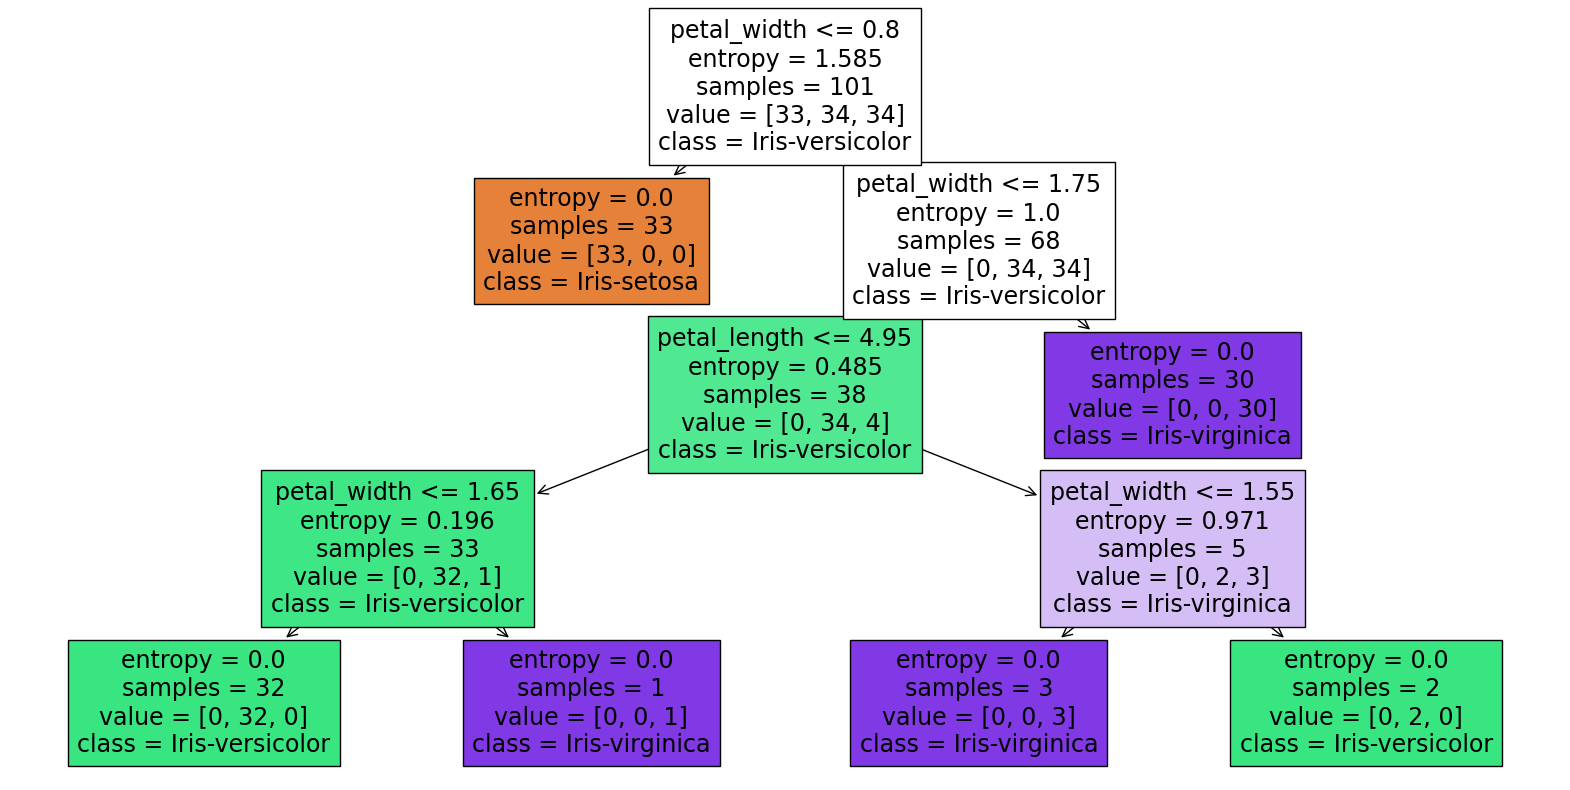

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Concatenate datasets A and B to form the training set
# the X_train contains 
X_train = pd.concat([A.iloc[:, :-1], B.iloc[:, :-1]], ignore_index=True)
y_train = pd.concat([A.iloc[:, -1], B.iloc[:, -1]], ignore_index=True)

# Use dataset C as the test set
X_test = C.iloc[:, :-1]
y_test = C.iloc[:, -1]


# Create and fit the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your trained DecisionTreeClassifier from above code
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()




In [75]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.96


Temos alguns jeitos de gerar a métrica de precisão. Os dados dessa base são balanceados, com o mesmo número de instâncias de cada espécie. Nesses casos, o tipo "macro" é o mais adequado. Essa métrica trata todas as classes igualmente, dando um peso igual para cada uma, sem considerar as frequências.    

In [76]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='macro')  

print(f"Precisão: {precision:.2f}")

Precisão: 0.96



Sensitividade (ou recall) é a medida do quão bom um modelo é em identificar os positivos verdadeiros para os casos positivos de fato das amostras. Ele é calculado como o número de positivos verdadeiros divididos pelo número de todas as amostras relevantes. Ou seja, todas as amostras que deviam ser identificadas como positivas. 

No contexto da base, sensitividade trata da capacidade de identificar corretamente Iris-setosa, por exemplo, quando ela o é de fato. 


In [77]:
from sklearn.metrics import recall_score

sensitivity = recall_score(y_test, y_pred, average='macro')

print(f"Sensitividade: {sensitivity:.2f}")


Sensitividade: 0.96


A especificidade mede o quão bem o modelo identifica as outras espécies (que seriam os casos negativos quando estamos focados em detectar Iris-setosa) corretamente. Ou seja, quando o modelo prevê que uma flor não é Iris-setosa, a especificidade nos diz quantas vezes essa previsão está correta, indicando que a flor é realmente uma Iris-versicolor ou Iris-virginica.

In [78]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

specificity_per_class = []
for i in range(len(cm)):
    tn = cm[0, 0] + cm[1, 1] - cm[i, i]
    fp = cm[i, :].sum() - cm[i, i]
    specificity_i = tn / (tn + fp)
    specificity_per_class.append(specificity_i)

print(f"Especificidade por classe: {specificity_per_class}")    

Especificidade por classe: [1.0, 0.9444444444444444, 0.9444444444444444]


In [79]:
# Using loc to add a new row
metrics_df.loc[len(metrics_df)] = {
    "treinamento": "A+B e teste C",
    "acurácia": accuracy,
    "sensitividade": sensitivity,
    "especificidade": specificity_per_class,
    "precision": precision
}


## Segundo: Treinamento (A+C) e Teste (B)

Como os textos 